In [1]:
import os
import sys
sys.path.insert(0, "..")
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
# Load dataframes
suppress_rule_df = pd.read_csv("../../_dump/theory_attacks/theory_suppress_rule.csv")
knowledge_amnesia_df = pd.read_csv("../../_dump/theory_attacks/theory_knowledge_amnesia.csv")

In [3]:
def get_col_as_np(df, tgt_col_name, filter_kvs = [], sort_by="num_repeats"):
    for k, v in filter_kvs:
        df = df[df[k].eq(v)]
    df = df.sort_values(by=[sort_by])
    x = df[sort_by].to_numpy()
    y = df[tgt_col_name].to_numpy()
    return x, y

In [4]:
# Some font size configurations
legend_fs = 14
title_fs = 14
axis_fs = 14
tick_fs = 14

<Figure size 640x480 with 0 Axes>

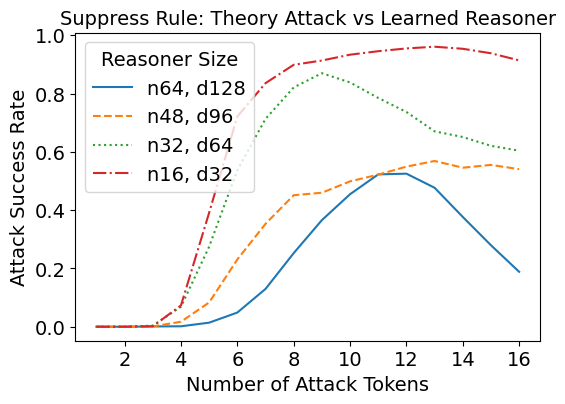

In [5]:
plt.clf()
fig = plt.figure(figsize=(6, 4))

x_64, y_64 = get_col_as_np(suppress_rule_df, "adv_ns3_state_acc",
    [("num_vars", 64), ("embed_dim", 128), ("reasoner_type", "learned")]
)

x_48, y_48 = get_col_as_np(suppress_rule_df, "adv_ns3_state_acc",
    [("num_vars", 48), ("embed_dim", 96), ("reasoner_type", "learned")]
)

x_32, y_32 = get_col_as_np(suppress_rule_df, "adv_ns3_state_acc",
    [("num_vars", 32), ("embed_dim", 64), ("reasoner_type", "learned")]
)

x_16, y_16 = get_col_as_np(suppress_rule_df, "adv_ns3_state_acc",
    [("num_vars", 16), ("embed_dim", 32), ("reasoner_type", "learned")]
)

plt.plot(x_64, y_64, linestyle="solid", label="n64, d128")
plt.plot(x_48, y_48, linestyle="dashed", label="n48, d96")
plt.plot(x_32, y_32, linestyle="dotted", label="n32, d64")
plt.plot(x_16, y_16, linestyle="dashdot", label="n16, d32")
plt.legend(loc="upper left", title="Reasoner Size", fontsize=legend_fs, title_fontsize=legend_fs)
plt.ylabel("Attack Success Rate", fontsize=axis_fs)
plt.xlabel("Number of Attack Tokens", fontsize=axis_fs)
plt.yticks(fontsize=tick_fs)
plt.xticks(fontsize=tick_fs)
plt.title("Suppress Rule: Theory Attack vs Learned Reasoner", fontsize=title_fs)
# plt.title("Theory-based Attacks Against Learned Reasoners", fontsize=title_fs)
plt.savefig("images/exp2_suppress_rule_acc.png", bbox_inches="tight", transparent=True)

<Figure size 640x480 with 0 Axes>

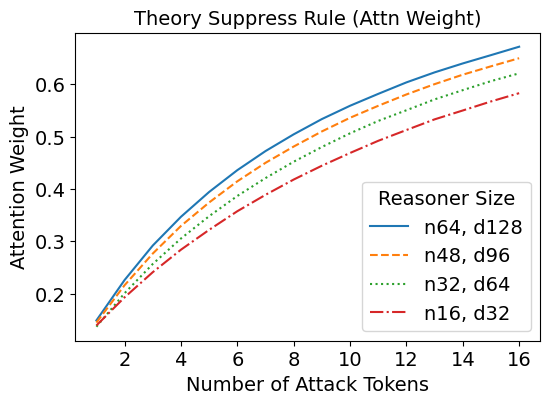

In [6]:
plt.clf()
fig = plt.figure(figsize=(6,4))

x_64, y_64 = get_col_as_np(suppress_rule_df, "adv_ns1_atk_wts",
    [("num_vars", 64), ("embed_dim", 128), ("reasoner_type", "learned")]
)

x_48, y_48 = get_col_as_np(suppress_rule_df, "adv_ns1_atk_wts",
    [("num_vars", 48), ("embed_dim", 96), ("reasoner_type", "learned")]
)

x_32, y_32 = get_col_as_np(suppress_rule_df, "adv_ns1_atk_wts",
    [("num_vars", 32), ("embed_dim", 64), ("reasoner_type", "learned")]
)

x_16, y_16 = get_col_as_np(suppress_rule_df, "adv_ns1_atk_wts",
    [("num_vars", 16), ("embed_dim", 32), ("reasoner_type", "learned")]
)

plt.plot(x_64, y_64, linestyle="solid", label="n64, d128")
plt.plot(x_48, y_48, linestyle="dashed", label="n48, d96")
plt.plot(x_32, y_32, linestyle="dotted", label="n32, d64")
plt.plot(x_16, y_16, linestyle="dashdot", label="n16, d32")
plt.legend(loc="lower right", title="Reasoner Size", fontsize=legend_fs, title_fontsize=legend_fs)
plt.ylabel("Attention Weight", fontsize=axis_fs)
plt.xlabel("Number of Attack Tokens", fontsize=axis_fs)
plt.yticks(fontsize=tick_fs)
plt.xticks(fontsize=tick_fs)
plt.title("Theory Suppress Rule (Attn Weight)", fontsize=title_fs)
# plt.title("Attack Tokens Attention vs Suppressed Rule Attention", fontsize=title_fs)
plt.savefig("images/exp2_suppress_rule_attn.png", bbox_inches="tight", transparent=True)

In [7]:
# Knowledge Amnesia

<Figure size 640x480 with 0 Axes>

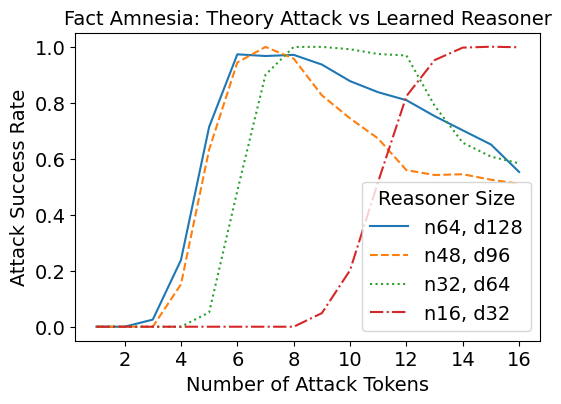

In [8]:
plt.clf()
fig = plt.figure(figsize=(6,4))

x_64, y_64 = get_col_as_np(knowledge_amnesia_df, "adv_ns1_state_acc",
    [("num_vars", 64), ("embed_dim", 128), ("reasoner_type", "learned")]
)

x_48, y_48 = get_col_as_np(knowledge_amnesia_df, "adv_ns1_state_acc",
    [("num_vars", 48), ("embed_dim", 96), ("reasoner_type", "learned")]
)

x_32, y_32 = get_col_as_np(knowledge_amnesia_df, "adv_ns1_state_acc",
    [("num_vars", 32), ("embed_dim", 64), ("reasoner_type", "learned")]
)

x_16, y_16 = get_col_as_np(knowledge_amnesia_df, "adv_ns1_state_acc",
    [("num_vars", 16), ("embed_dim", 32), ("reasoner_type", "learned")]
)

plt.plot(x_64, y_64, linestyle="solid", label="n64, d128")
plt.plot(x_48, y_48, linestyle="dashed", label="n48, d96")
plt.plot(x_32, y_32, linestyle="dotted", label="n32, d64")
plt.plot(x_16, y_16, linestyle="dashdot", label="n16, d32")
plt.legend(loc="lower right", title="Reasoner Size", fontsize=legend_fs, title_fontsize=legend_fs)
plt.ylabel("Attack Success Rate", fontsize=axis_fs)
plt.xlabel("Number of Attack Tokens", fontsize=axis_fs)
plt.yticks(fontsize=tick_fs)
plt.xticks(fontsize=tick_fs)
plt.title("Fact Amnesia: Theory Attack vs Learned Reasoner", fontsize=title_fs)
# plt.title("Theory-based Attacks Against Learned Reasoners", fontsize=title_fs)
plt.savefig("images/exp2_knowledge_amnesia_acc.png", bbox_inches="tight", transparent=True)

<Figure size 640x480 with 0 Axes>

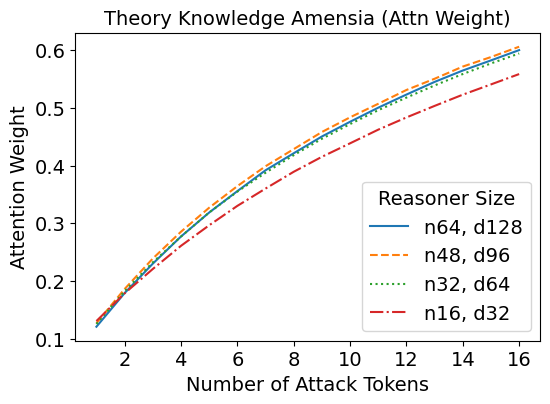

In [9]:
plt.clf()
fig = plt.figure(figsize=(6,4))

x_64, y_64 = get_col_as_np(knowledge_amnesia_df, "adv_ns1_atk_wts",
    [("num_vars", 64), ("embed_dim", 128), ("reasoner_type", "learned")]
)

x_48, y_48 = get_col_as_np(knowledge_amnesia_df, "adv_ns1_atk_wts",
    [("num_vars", 48), ("embed_dim", 96), ("reasoner_type", "learned")]
)

x_32, y_32 = get_col_as_np(knowledge_amnesia_df, "adv_ns1_atk_wts",
    [("num_vars", 32), ("embed_dim", 64), ("reasoner_type", "learned")]
)

x_16, y_16 = get_col_as_np(knowledge_amnesia_df, "adv_ns1_atk_wts",
    [("num_vars", 16), ("embed_dim", 32), ("reasoner_type", "learned")]
)

plt.plot(x_64, y_64, linestyle="solid", label="n64, d128")
plt.plot(x_48, y_48, linestyle="dashed", label="n48, d96")
plt.plot(x_32, y_32, linestyle="dotted", label="n32, d64")
plt.plot(x_16, y_16, linestyle="dashdot", label="n16, d32")
plt.legend(loc="lower right", title="Reasoner Size", fontsize=legend_fs, title_fontsize=legend_fs)
plt.ylabel("Attention Weight", fontsize=axis_fs)
plt.xlabel("Number of Attack Tokens", fontsize=axis_fs)
plt.yticks(fontsize=tick_fs)
plt.xticks(fontsize=tick_fs)
plt.title("Theory Knowledge Amensia (Attn Weight)", fontsize=title_fs)
# plt.title("Attack Tokens Attention vs Suppressed Rule Attention", fontsize=title_fs)
plt.savefig("images/exp2_knowledge_amnesia_attn.png", bbox_inches="tight", transparent=True)

In [10]:
suppress_rule_df.columns.values

array(['reasoner_type', 'train_seed', 'num_vars', 'embed_dim',
       'num_repeats', 'raw_state_acc', 'adv_ns1_state_acc',
       'adv_ns2_state_acc', 'adv_ns3_state_acc', 'adv_ns1_atk_wts',
       'adv_ns2_atk_wts', 'adv_ns3_atk_wts', 'adv_ns1_ab_wts',
       'adv_ns2_ab_wts', 'adv_ns3_ab_wts', 'adv_ns1_ac_wts',
       'adv_ns2_ac_wts', 'adv_ns3_ac_wts'], dtype=object)

In [11]:
list(suppress_rule_df.columns.values)

['reasoner_type',
 'train_seed',
 'num_vars',
 'embed_dim',
 'num_repeats',
 'raw_state_acc',
 'adv_ns1_state_acc',
 'adv_ns2_state_acc',
 'adv_ns3_state_acc',
 'adv_ns1_atk_wts',
 'adv_ns2_atk_wts',
 'adv_ns3_atk_wts',
 'adv_ns1_ab_wts',
 'adv_ns2_ab_wts',
 'adv_ns3_ab_wts',
 'adv_ns1_ac_wts',
 'adv_ns2_ac_wts',
 'adv_ns3_ac_wts']

In [12]:
ddd = {"c": 3, "a": 1, "b": 2}

In [13]:
list(ddd.keys())

['c', 'a', 'b']